In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xls")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

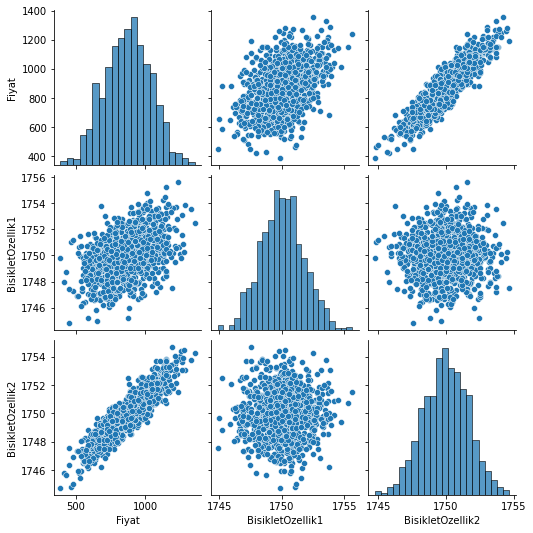

In [5]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye ayırmak

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
y_train.shape

(670,)

In [12]:
y_test.shape

(330,)

In [13]:
#scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [19]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")

In [22]:
model.fit(x_train,y_train,epochs=250)

===================] - 0s 1ms/step - loss: 804566.6222
Epoch 21/250
21/21 [==============================] - 0s 2ms/step - loss: 791567.3665
Epoch 22/250
21/21 [==============================] - 0s 2ms/step - loss: 795604.7784
Epoch 23/250
21/21 [==============================] - 0s 1ms/step - loss: 791004.0994
Epoch 24/250
21/21 [==============================] - 0s 3ms/step - loss: 783503.9517
Epoch 25/250
21/21 [==============================] - 0s 2ms/step - loss: 793601.2642
Epoch 26/250
21/21 [==============================] - 0s 2ms/step - loss: 805999.0994
Epoch 27/250
21/21 [==============================] - 0s 1ms/step - loss: 797957.2017
Epoch 28/250
21/21 [==============================] - 0s 2ms/step - loss: 800904.9801
Epoch 29/250
21/21 [==============================] - 0s 1ms/step - loss: 781486.2159
Epoch 30/250
21/21 [==============================] - 0s 2ms/step - loss: 803245.7670
Epoch 31/250
21/21 [==============================] - 0s 2ms/step - loss: 775836.4688

In [23]:
loss = model.history.history["loss"]

<AxesSubplot:>

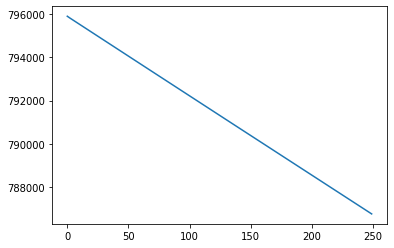

In [24]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [25]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [26]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [27]:
trainLoss

786738.75

In [28]:
testLoss

764289.375

In [29]:
testTahminleri = model.predict(x_test)

In [30]:
testTahminleri

array([[5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.2574134],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],
       [5.255998 ],


In [31]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [32]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [33]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [34]:
testTahminleri

0      5.255998
1      5.255998
2      5.255998
3      5.255998
4      5.255998
         ...   
325    5.255998
326    5.255998
327    5.255998
328    5.255998
329    5.255998
Length: 330, dtype: float32

In [35]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [36]:
tahminDf

,Gerçek Y,0
0,1081.652164,5.255998
1,622.675990,5.255998
2,889.356810,5.255998
3,902.826733,5.255998
4,897.662404,5.255998
...,...,...
325,1028.438035,5.255998
326,789.934950,5.255998
327,758.490486,5.255998
328,1172.871659,5.255998


In [37]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [38]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,5.255998
1,622.675990,5.255998
2,889.356810,5.255998
3,902.826733,5.255998
4,897.662404,5.255998
...,...,...
325,1028.438035,5.255998
326,789.934950,5.255998
327,758.490486,5.255998
328,1172.871659,5.255998


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

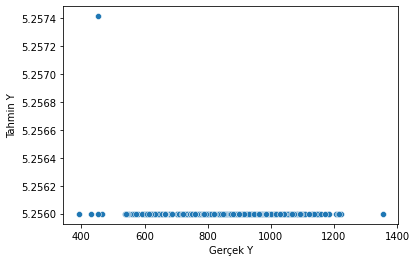

In [39]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

858.639732433106

In [42]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

764289.3788331028

In [43]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [44]:
yeniBisikletOzellikleri = [[1751,1750]]

In [45]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [47]:
model.predict(yeniBisikletOzellikleri)

array([[5.255998]], dtype=float32)

In [48]:
from tensorflow.keras.models import load_model

In [52]:
model.save("bisiklet_modeli.h5")

In [53]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")

In [54]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

array([[5.255998]], dtype=float32)